# Compare Tissues

In [53]:
library(ggplot2)
library(forcats)
library(tidyverse)
suppressPackageStartupMessages(library(tidyverse))
library(ggrepel)

In [3]:
source('../../prj_helpers.R')

In [7]:
# Load results of previous analyses

In [1]:
results_paths = c(
    adrenal = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/01-Adrenal/output/adrenal__infected_vs_uninfected.de.csv",
    spleen = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/02-Spleen/output/spleen.de.csv",
    lymph_node_ax_r = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/03-LymphNode_AX_R/output/LN_AX_R.de.csv",
    lymph_node_ing_l = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/04-LymphNode_ING_L/output/LN_ING_L.de.csv",
    lymph_node_mes = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/05-LymphNode_MES/output/LN_MES.de.csv",
    kidney = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/06-Kidney/output/Kidney.de.csv",
    # liver is early /late
    #liver = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/07-Liver/output/Liver.de.csv",
    brain_gray = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/08-Brain_Brain-Gr/output/BrainGray.de.csv",
    sex_organ_ovary = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/10-SexOrgan_Ovary/output/SexOrgan_Ovary.de.csv",
    sex_organ_sex_organ = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/12-SexOrgan_SexOrgan/output/SexOrgan_SexOrgan.de.csv",
    skin_rash = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/13-Skin_Rash/output/Skin_Rash.de.csv",
    #lung = "/home/nbarkas/disk2/ebov_bulk_rna_seq/proc_20210329/08-simple-de-by-tissue/14-Lung/output/Lung.de.csv",
    skin_non_rash = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/15-Skin_NonRash/output/Skin_NonRash.de.csv",
    brain_white = "/home/nbarkas/disk3/ebov_bulk_rna_seq/proc_20210524/08-simple-de-by-tissue/16-Brain_Brain-Wh/output/Brain_White.de.csv"
)

In [2]:
results.all.tissues <- lapply(results_paths, read.csv)

In [4]:
de.genes.all.tissues <- lapply(results.all.tissues, function(x) {
    xp <- x[NA2FALSE(x$padj < 0.05),]
    unique(xp$Geneid)
})

In [5]:
n.de.per.tissue <- unlist(lapply(de.genes.all.tissues, length))
n.de.df.plot <- data.frame(
    tissue = names(n.de.per.tissue),
    n.genes = n.de.per.tissue
)

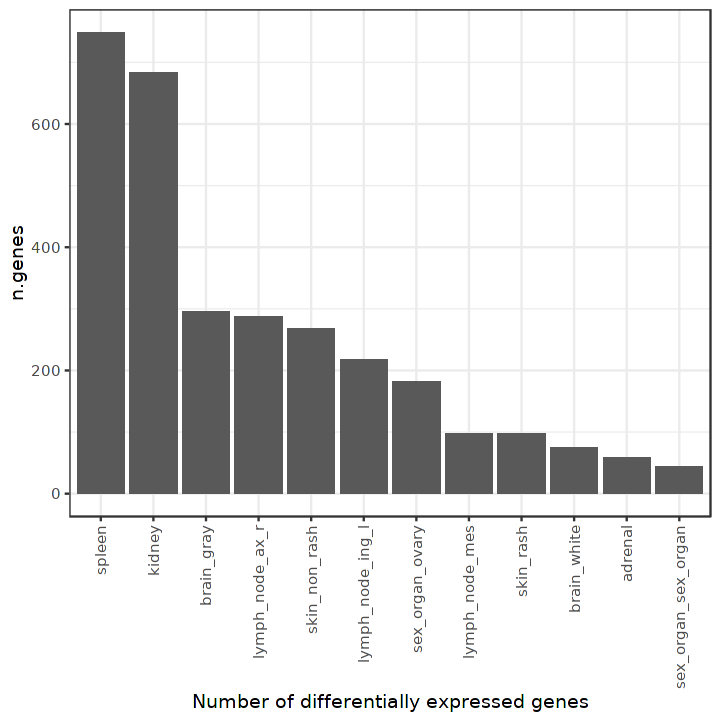

In [8]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(n.de.df.plot, aes(x=fct_reorder(tissue, desc(n.genes)),y=n.genes)) +
    geom_bar(stat='identity') + 
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_x_discrete("Number of differentially expressed genes")

In [9]:
ggsave('output/n_de_genes.png',w=10,h=10)

In [10]:
tissues.expressed.cutoff <- 3
recurrent.genes <- names(which(sort(table(unlist(de.genes.all.tissues)),decreasing = T) > tissues.expressed.cutoff))

In [11]:
length(recurrent.genes)

[1] 169

In [12]:
recurrent.genes <- recurrent.genes[recurrent.genes != '']

In [13]:
length(recurrent.genes)

[1] 169

In [14]:
head(recurrent.genes)

[1] "ENSMMUG00000001569.4" "ENSMMUG00000003272.4" "ENSMMUG00000005001.4"
[4] "ENSMMUG00000008505.4" "ENSMMUG00000009602.4" "ENSMMUG00000010314.4"

In [15]:
saveRDS(recurrent.genes,'recurrent.genes.rds')

In [129]:
# Save recurrent Genes as a table

In [134]:
write.csv(x = gene_map[gene_map$Geneid %in% recurrent.genes,], file='output/recurrent_genes.csv')

In [16]:
tmp1 <- lapply(results.all.tissues, function(x) {
    rownames(x) <- x$Geneid
    x[recurrent.genes,]$log2FoldChange
})
tmp2 <- do.call(cbind, tmp1)
rownames(tmp2) <- recurrent.genes

In [17]:
# Create a gene map
gene_map <- results.all.tissues[[1]][,c('Geneid','external_gene_name')]
head(gene_map)

,Geneid,external_gene_name
,<chr>,<chr>
1,ENSMMUG00000015329.4,MX1
2,ENSMMUG00000044257.2,MX2
3,ENSMMUG00000012782.4,OAS1
4,ENSMMUG00000050757.1,ISG15
5,ENSMMUG00000008505.4,OAS2
6,ENSMMUG00000009602.4,XAF1


In [18]:
# Convert ens ids to gene names, if they can be converted. Keep as is otherwise
new.names <- sapply(rownames(tmp2), function(x) { 
    new.name <- gene_map[match(x, gene_map$Geneid),'external_gene_name']
    ifelse(new.name != '', new.name, x)
})
rownames(tmp2) <- new.names

In [19]:
head(new.names)

ENSMMUG00000001569.4   ENSMMUG00000003272.4   ENSMMUG00000005001.4 
              "IFI44L" "ENSMMUG00000003272.4"                "IFIT3" 
  ENSMMUG00000008505.4   ENSMMUG00000009602.4   ENSMMUG00000010314.4 
                "OAS2"                 "XAF1"                "HERC6"

In [20]:
# Run go on these genes

In [21]:
# Some tissue results for the metadata that the go function needs
adrenal.res.pp <- readRDS('../02-Spleen//res.spleen.pp.rds')
#lung.res.pp <- readRDS('../14-Lung/res.lung.pp.rds')

In [22]:
library(goseq)

Loading required package: BiasedUrn

Loading required package: geneLenDataBase





In [23]:
runMacaqueGO_from_genes <- function (genes, res, test.cats = c("GO:CC", "GO:BP", "GO:MF")) 
{
    gene.lengths <- res$Length
    names(gene.lengths) <- rownames(res)
    
    bias <- gene.lengths[names(genes)]

    pwf <- nullp(genes, "rheMac10", "ensGene", bias.data = bias)
    rownames(pwf) <- make.unique(nbHelpers::strpart(rownames(pwf), ".", 1, fixed = T))
    
    gene2cat <- getgo(genes = nbHelpers::strpart(names(genes), 
        split = ".", fixed = T, n = 1), genome = "rheMac10", 
        id = "ensGene", fetch.cats = test.cats)
    
    goseq_res1 <- goseq(pwf = pwf, genome = "rheMac10", gene2cat = gene2cat, test.cats = test.cats)
    
    invisible(goseq_res1)
}

In [24]:
z <- as.numeric(rownames(adrenal.res.pp) %in% names(new.names))
names(z) <- rownames(adrenal.res.pp)

In [25]:
table(z)

z
    0     1 
35226   169 

Warning message in pcls(G):
“initial point very close to some inequality constraints”
Using manually entered categories.

For 25030 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

'select()' returned 1:1 mapping between keys and columns



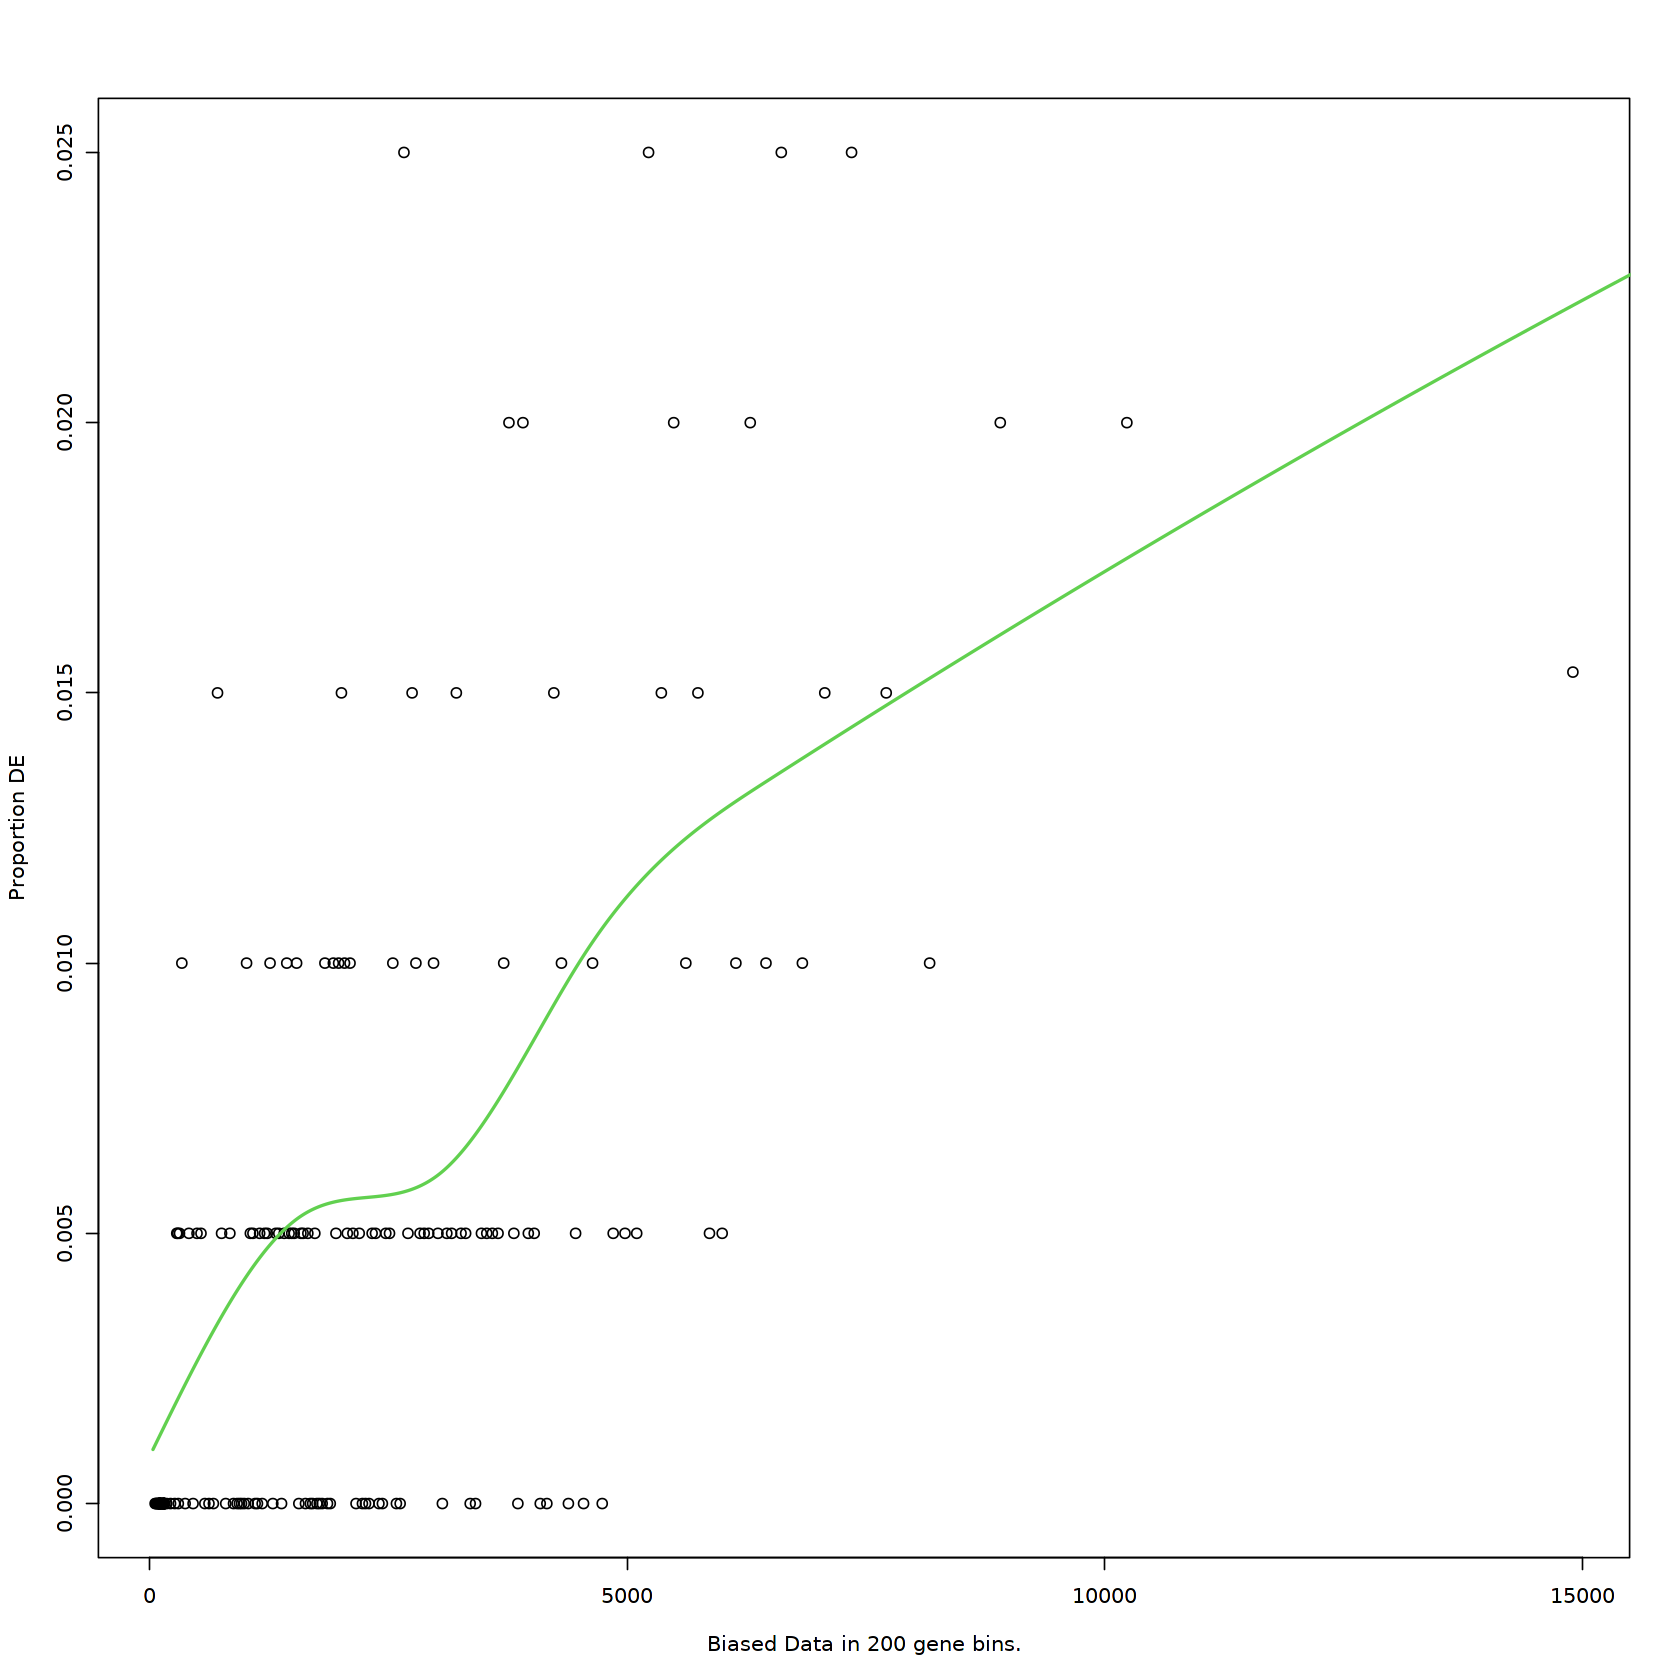

In [30]:
common.genes.go <- runMacaqueGO_from_genes(z, adrenal.res.pp)

In [31]:
head(common.genes.go)

,category,over_represented_pvalue,under_represented_pvalue,numDEInCat,numInCat,term,ontology
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
5154,GO:0019079,0.000000e+00,1,11,35,viral genome replication,BP
9302,GO:0045069,0.000000e+00,1,11,30,regulation of viral genome replication,BP
9304,GO:0045071,0.000000e+00,1,11,19,negative regulation of viral genome replication,BP
10990,GO:0051707,5.736693e-30,1,36,385,response to other organism,BP
8792,GO:0043207,6.527368e-30,1,36,387,response to external biotic stimulus,BP
3683,GO:0009607,1.102210e-29,1,36,394,response to biotic stimulus,BP


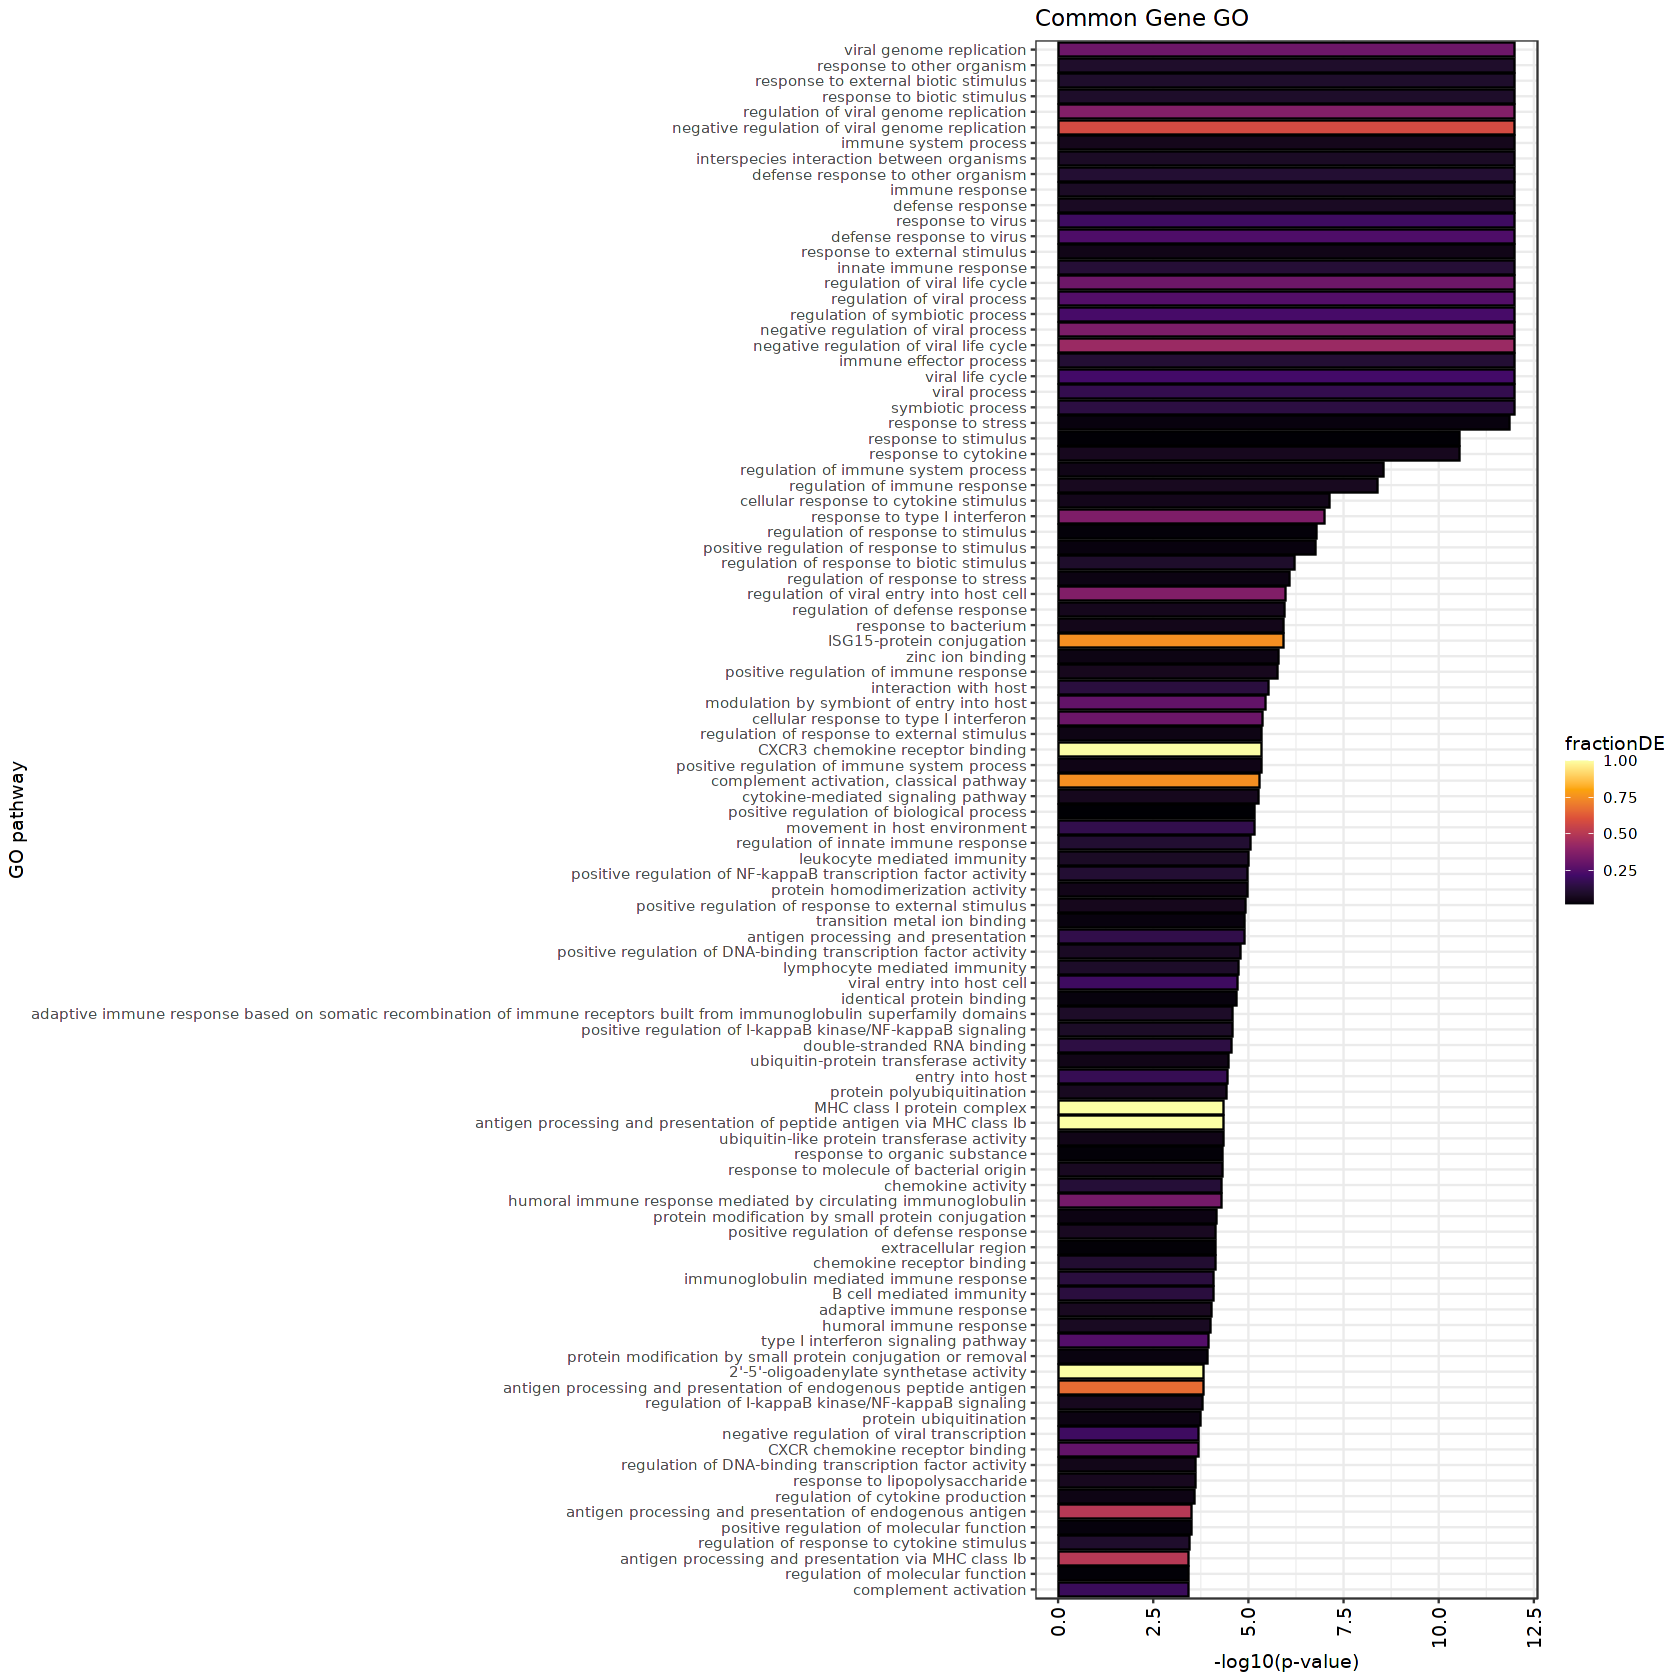

In [32]:
options(repr.plot.width=14, repr.plot.height=14)

common.genes.go %>%
    mutate(fractionDE=numDEInCat/numInCat) %>%
    mutate(scaledPval= -log10(over_represented_pvalue+1e-12) ) %>%
    head(n=100) %>% 
    ggplot(aes(x=reorder(term, (scaledPval) ),fill=fractionDE,y=scaledPval)) + 
    geom_bar(stat='identity',color='black') +
    theme_bw() + 
    theme(
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, color='black', size=11)) +
    scale_x_discrete(name="GO pathway") +
    scale_y_continuous(name="-log10(p-value)") + 
    scale_fill_viridis_c(option='B') +
    ggtitle("Common Gene GO") + coord_flip()

In [33]:
ggsave('output/common_go_response.png',w=7,h=24)

In [34]:
common.genes.go %>%
    mutate(fractionDE=numDEInCat/numInCat) %>%
    mutate(scaledPval= -log10(over_represented_pvalue+1e-12) ) -> zzp
write.csv(zzp, "output/common.pathways.csv")

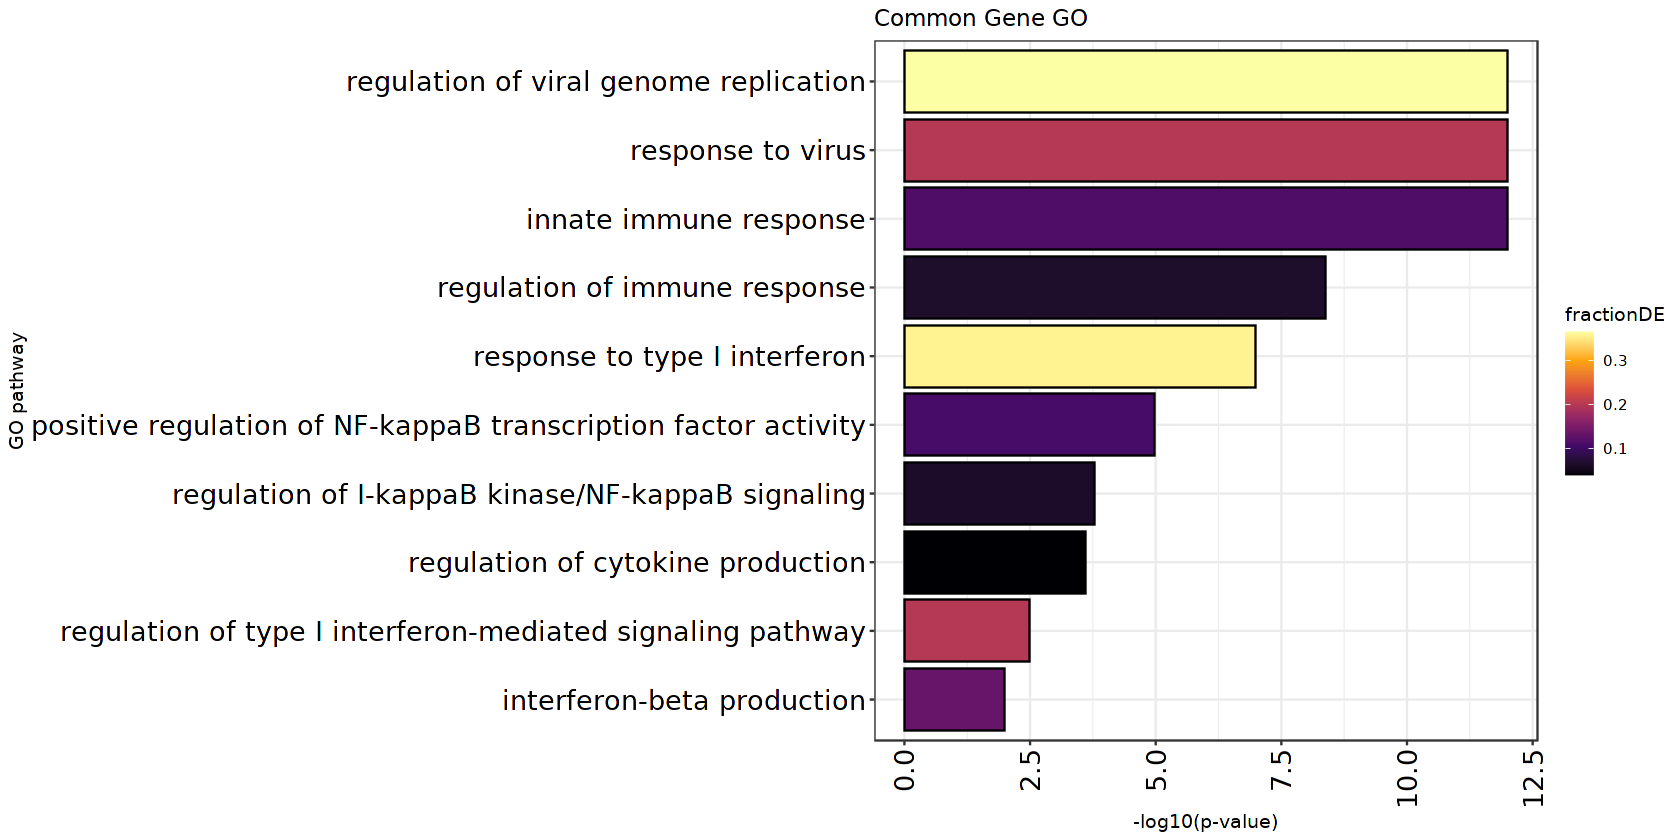

In [35]:
options(repr.plot.width=14, repr.plot.height=7)

select.pathways <- c("GO:0009615",
"GO:0045069",
"GO:0045087",
"GO:0034340",
"GO:0001817",
"GO:0051092",
"GO:0050776",
"GO:0043122",
"GO:0060338",
"GO:0032608")

common.genes.go %>%
    mutate(fractionDE=numDEInCat/numInCat) %>%
    mutate(scaledPval= -log10(over_represented_pvalue+1e-12) ) %>%
    filter(category %in% select.pathways) %>% 
    ggplot(aes(x=reorder(term, (scaledPval) ),fill=fractionDE,y=scaledPval)) + 
    geom_bar(stat='identity',color='black') +
    theme_bw() + 
    theme(
            axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, color='black', size=16),
            axis.text.y = element_text(color='black', size=16)
    ) +
    scale_x_discrete(name="GO pathway") +
    scale_y_continuous(name="-log10(p-value)") + 
    scale_fill_viridis_c(option='B') +
    ggtitle("Common Gene GO") + coord_flip()

### Heatmap of recurrent genes

In [36]:
library(pheatmap)
library(viridis)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:viridisLite’:

    viridis.map




In [37]:
pheatmap(tmp2,show_rownames = TRUE, color=inferno(10), fontsize_row=6, filename='output/recurrent_genes.png')

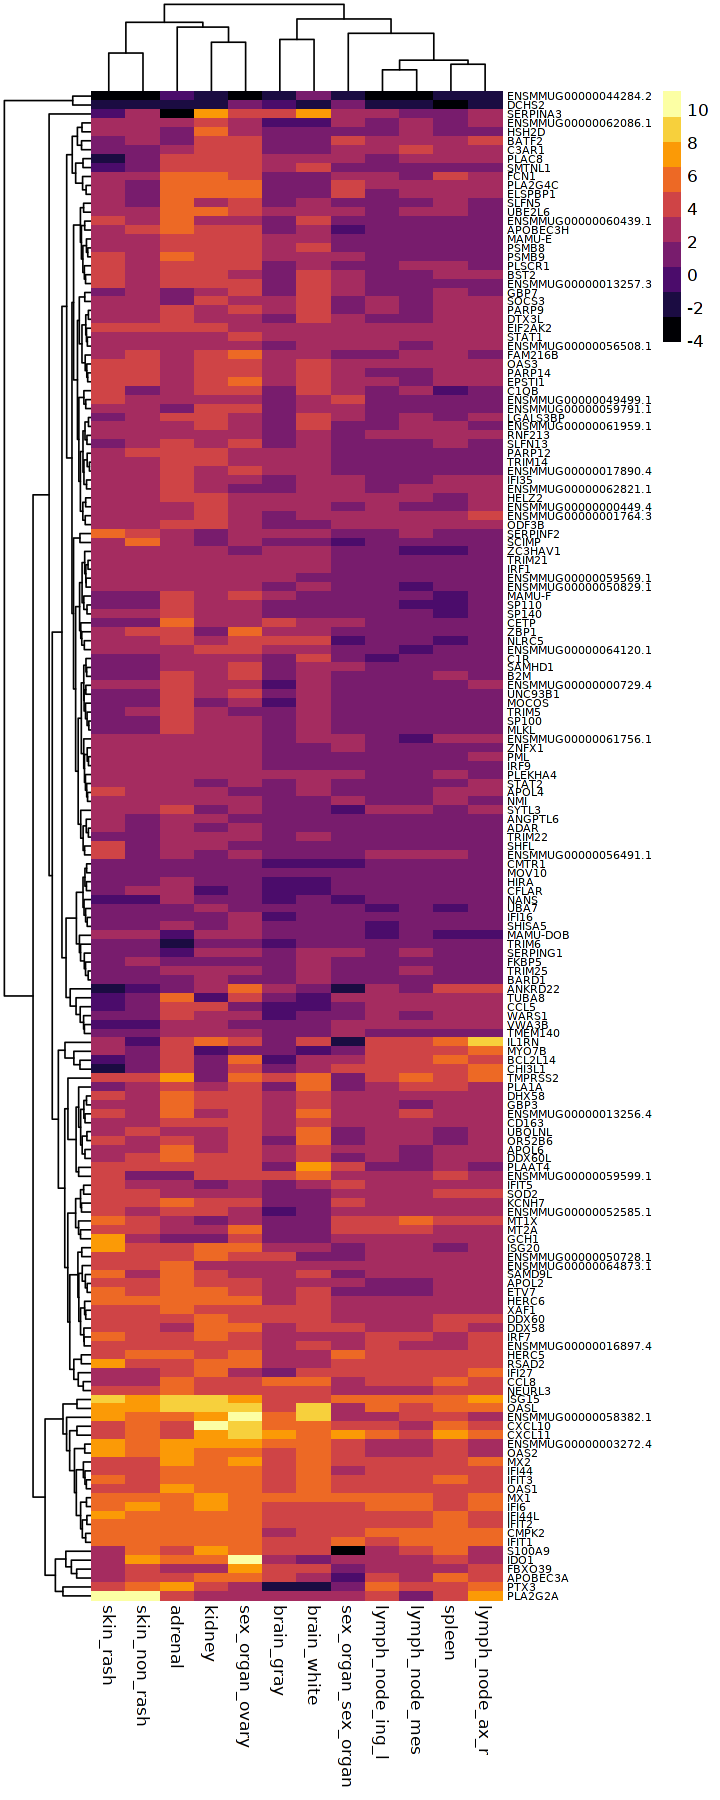

In [38]:
options(repr.plot.width=6, repr.plot.height=15)
pheatmap(tmp2,show_rownames = TRUE, color=inferno(10), fontsize_row=6)

# PCA of fold changes

## Prepare matrix

In [70]:
# Check if the names are in the same order
z <- lapply(results.all.tissues, function(x) {x$X})
all(z[[1]] == z[[2]])

[1] FALSE

In [71]:
# Put in order
results.all.tissues.o_gene <- lapply(results.all.tissues, function(x) {x[order(x$X),]})

In [72]:
all(results.all.tissues.o_gene[[1]]$X == results.all.tissues.o_gene[[2]]$X)

[1] TRUE

In [73]:
flc.mat <- do.call(cbind,lapply(results.all.tissues.o_gene, function(x) {x$log2FoldChange}))
rownames(flc.mat) <- results.all.tissues.o_gene[[1]]$X

In [74]:
flc.mat[is.na(flc.mat)] <- 0

In [75]:
flc.mat[1:3,1:3]

,adrenal,spleen,lymph_node_ax_r
ENSMMUG00000000001.4,0.4975436,-0.1794700,0.5442809
ENSMMUG00000000002.4,0.4348440,-0.2279602,1.2656310
ENSMMUG00000000005.4,1.5331613,-0.1966687,0.7392688


In [76]:
# pick genes de in at least one tissue
de.genes <- unique(unlist(lapply(results.all.tissues, function(x) {x$X[x$padj < 0.05]})))

In [77]:
de.genes <- de.genes[!is.na(de.genes)]

In [78]:
pca.lfc.sel <- prcomp(t(scale(flc.mat[de.genes,])))

In [99]:
plot.df <- data.frame(tissue=rownames(pca.lfc.sel$x),pca.lfc.sel$x[,1:5])

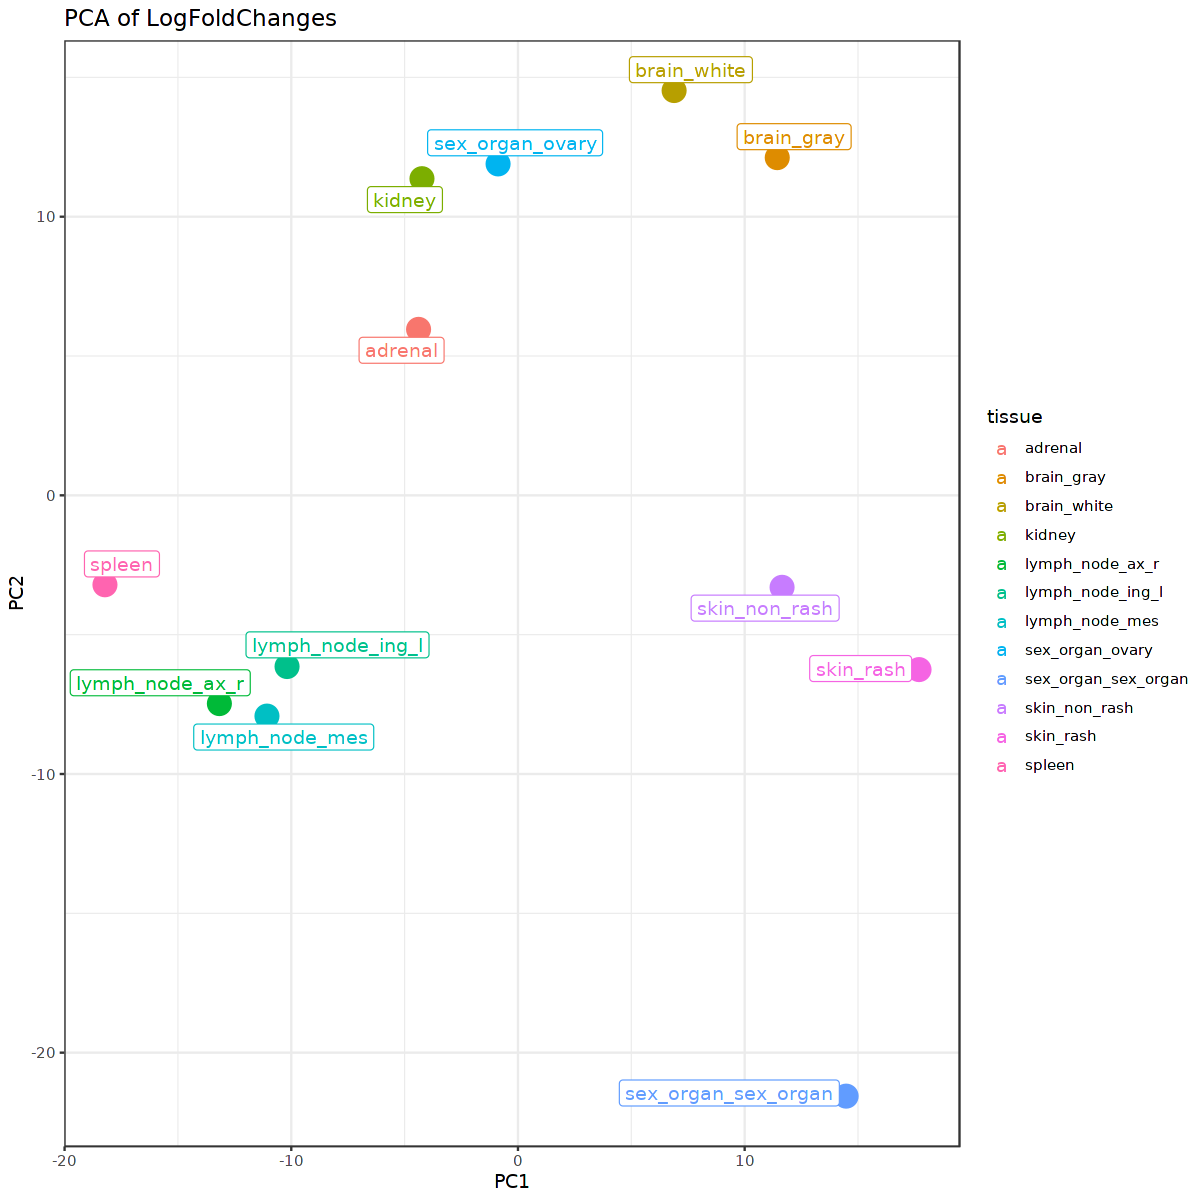

In [80]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(plot.df, aes(color=tissue, x=PC1, y=PC2)) + 
    geom_point(size=6) + 
    theme_bw() + 
    geom_label_repel(aes(label=tissue)) + 
    ggtitle('PCA of LogFoldChanges')

In [81]:
ggsave('output/pca_lfc.png',w=8,h=8)

In [82]:
# Show the genes weighted in these PCs

In [93]:
n.top.genes.per.pc <- 40

loaded.genes <- unique(c(
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC1')]),decreasing = T)),n=n.top.genes.per.pc),
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC2')]),decreasing = T)),n=n.top.genes.per.pc)
    ))

loading_scale <- 0.7e2
loaded.genes.df <- as.data.frame(pca.lfc.sel$rotation[loaded.genes,c('PC1','PC2')])

loaded.genes.df$symbol <- gene_map$external_gene_name[match(rownames(loaded.genes.df), gene_map$Geneid)]

In [86]:
options(repr.plot.width = 15, repr.plot.height = 15)

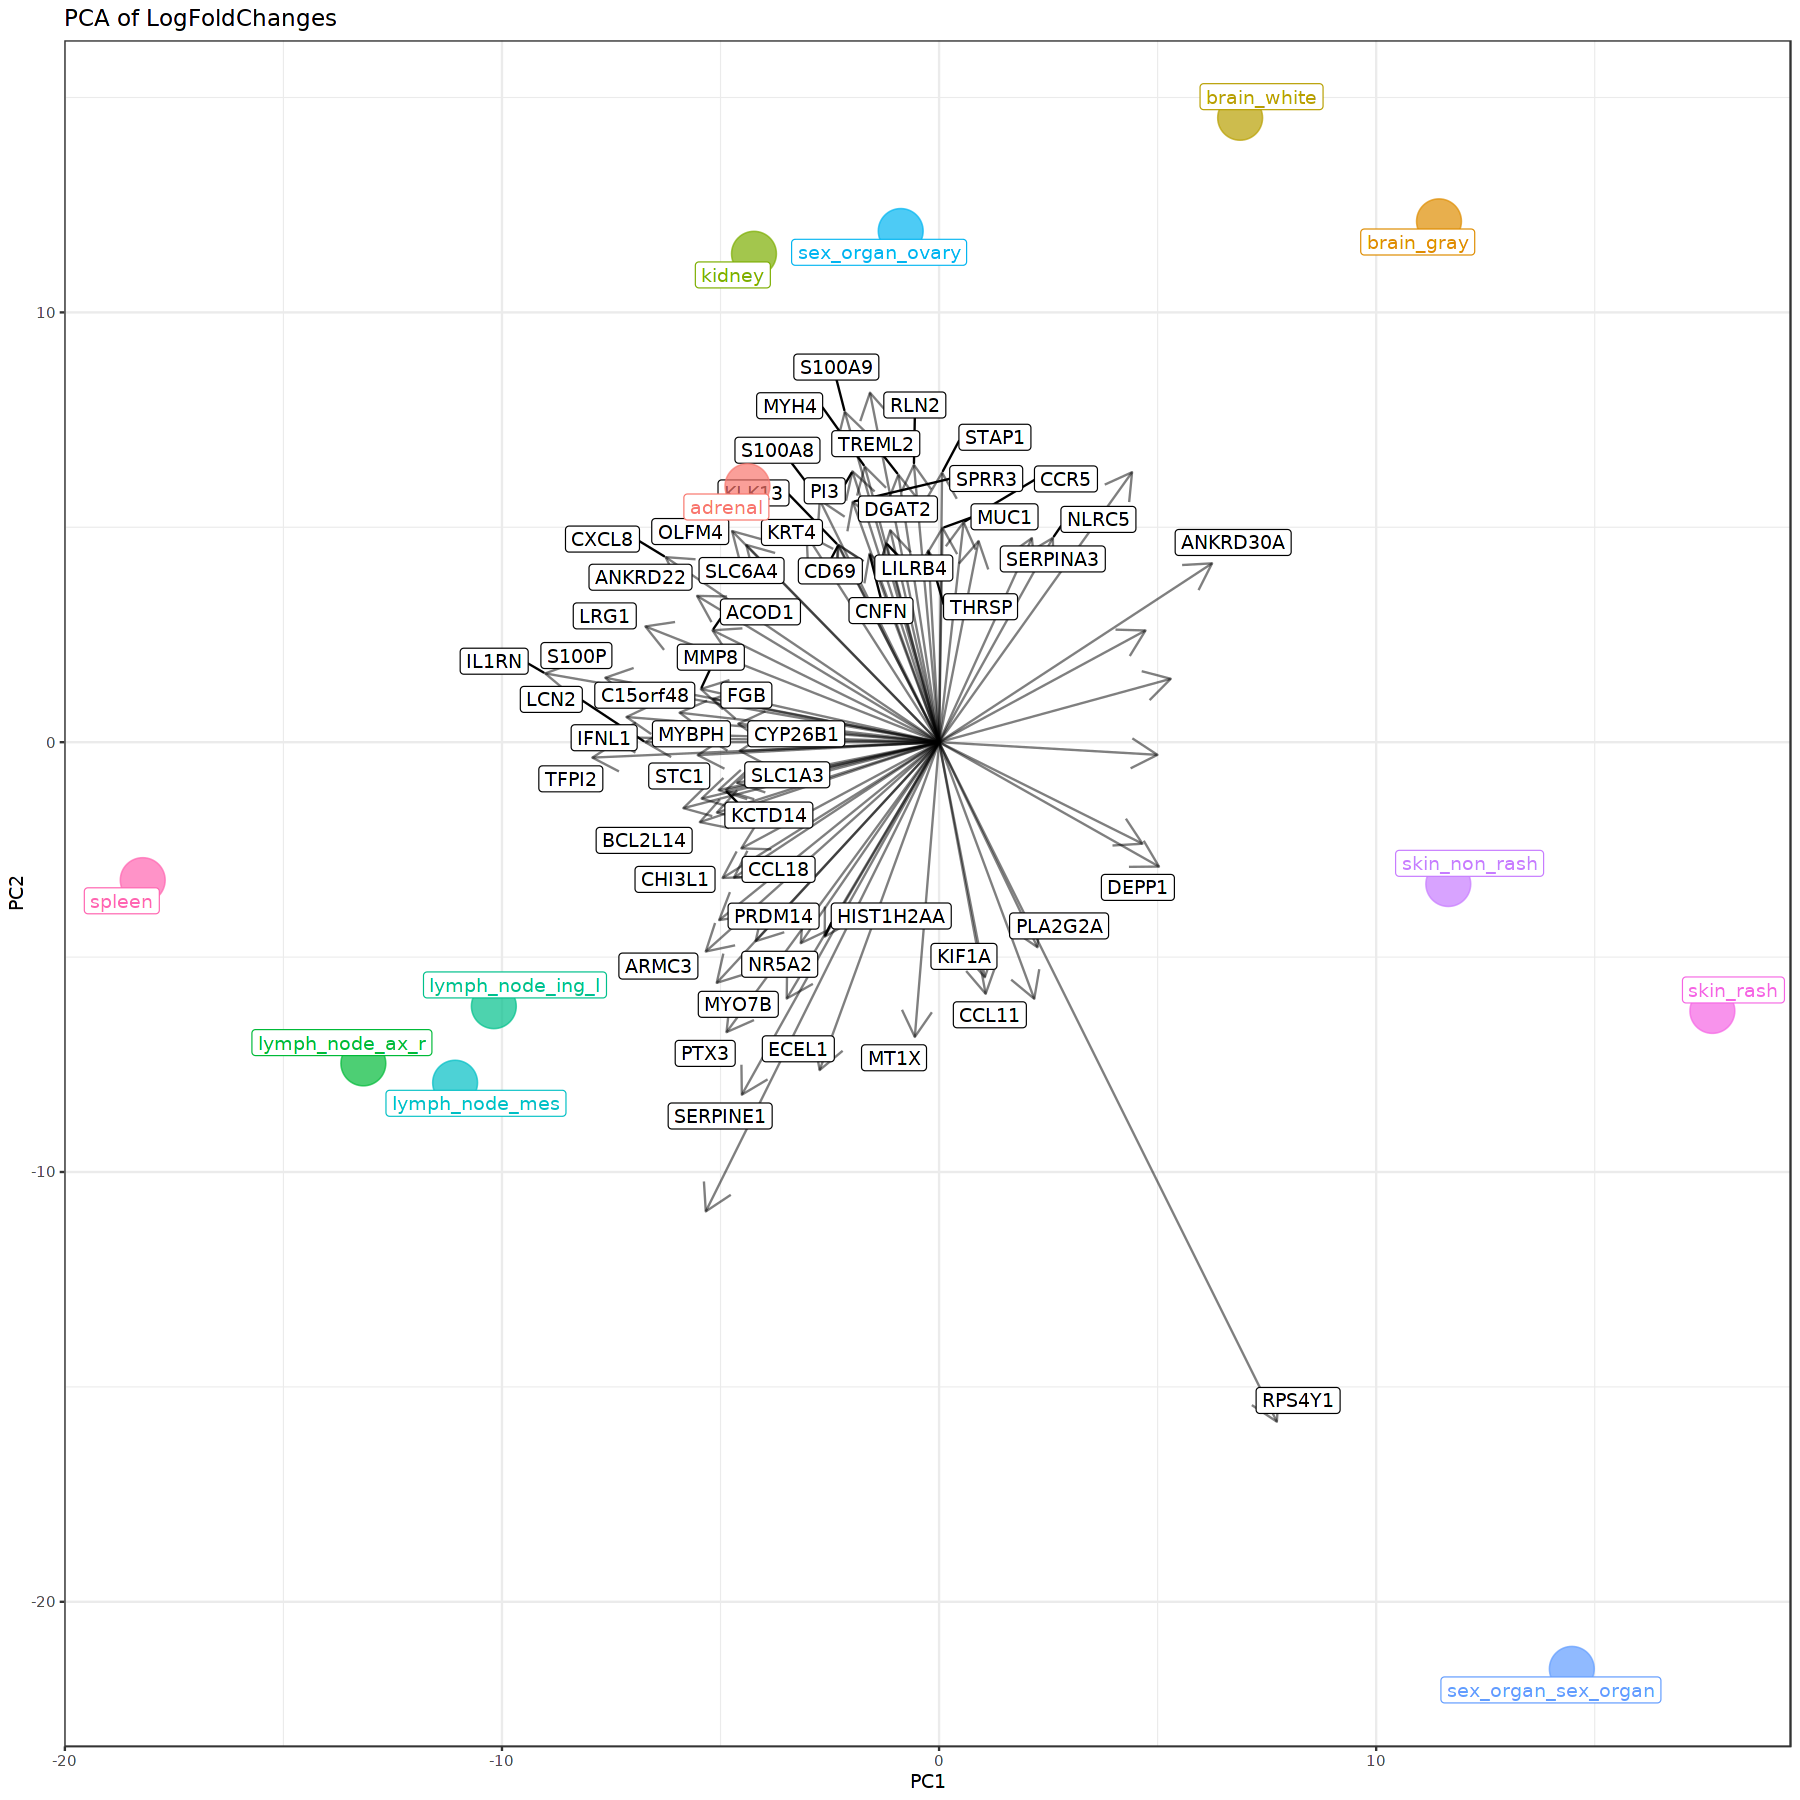

In [87]:
ggplot(plot.df, aes(color=tissue, x=PC1, y=PC2)) + 
    theme_bw() + 
    geom_segment(
        alpha=0.5,
        arrow = arrow(),
        data=loaded.genes.df,
        aes(x=0,y=0,xend=PC1*loading_scale,yend=PC2*loading_scale),inherit.aes=F
    ) +   ggtitle('PCA of LogFoldChanges') +
    geom_label_repel(data=loaded.genes.df,aes(x=PC1*loading_scale,y=PC2*loading_scale,label=symbol),inherit.aes=F,max.overlaps=100) +
    geom_point(size=12, alpha=0.7) +
    geom_label_repel(aes(label=tissue)) +
    theme(legend.position = 'none')

In [88]:
ggsave('output/pca_lfc_withloadings.png',w=10,h=10)

In [103]:
head(gene_map)

,Geneid,external_gene_name
,<chr>,<chr>
1,ENSMMUG00000015329.4,MX1
2,ENSMMUG00000044257.2,MX2
3,ENSMMUG00000012782.4,OAS1
4,ENSMMUG00000050757.1,ISG15
5,ENSMMUG00000008505.4,OAS2
6,ENSMMUG00000009602.4,XAF1


In [105]:
get_id_from_symbol <- function(symbol) { gene_map$Geneid[gene_map$external_gene_name == symbol]}

In [127]:
plot_gene_fcs <- function(gene) {
    tmp_df <- as.data.frame(flc.mat[get_id_from_symbol(gene),])
    colnames(tmp_df) <- c("fc")
    tmp_df$tissue <- rownames(tmp_df)
    ggplot(tmp_df, aes(x=tissue,y=fc, fill=tissue)) + geom_bar(stat='identity') + 
        theme_bw() +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1,size=20))
        
}

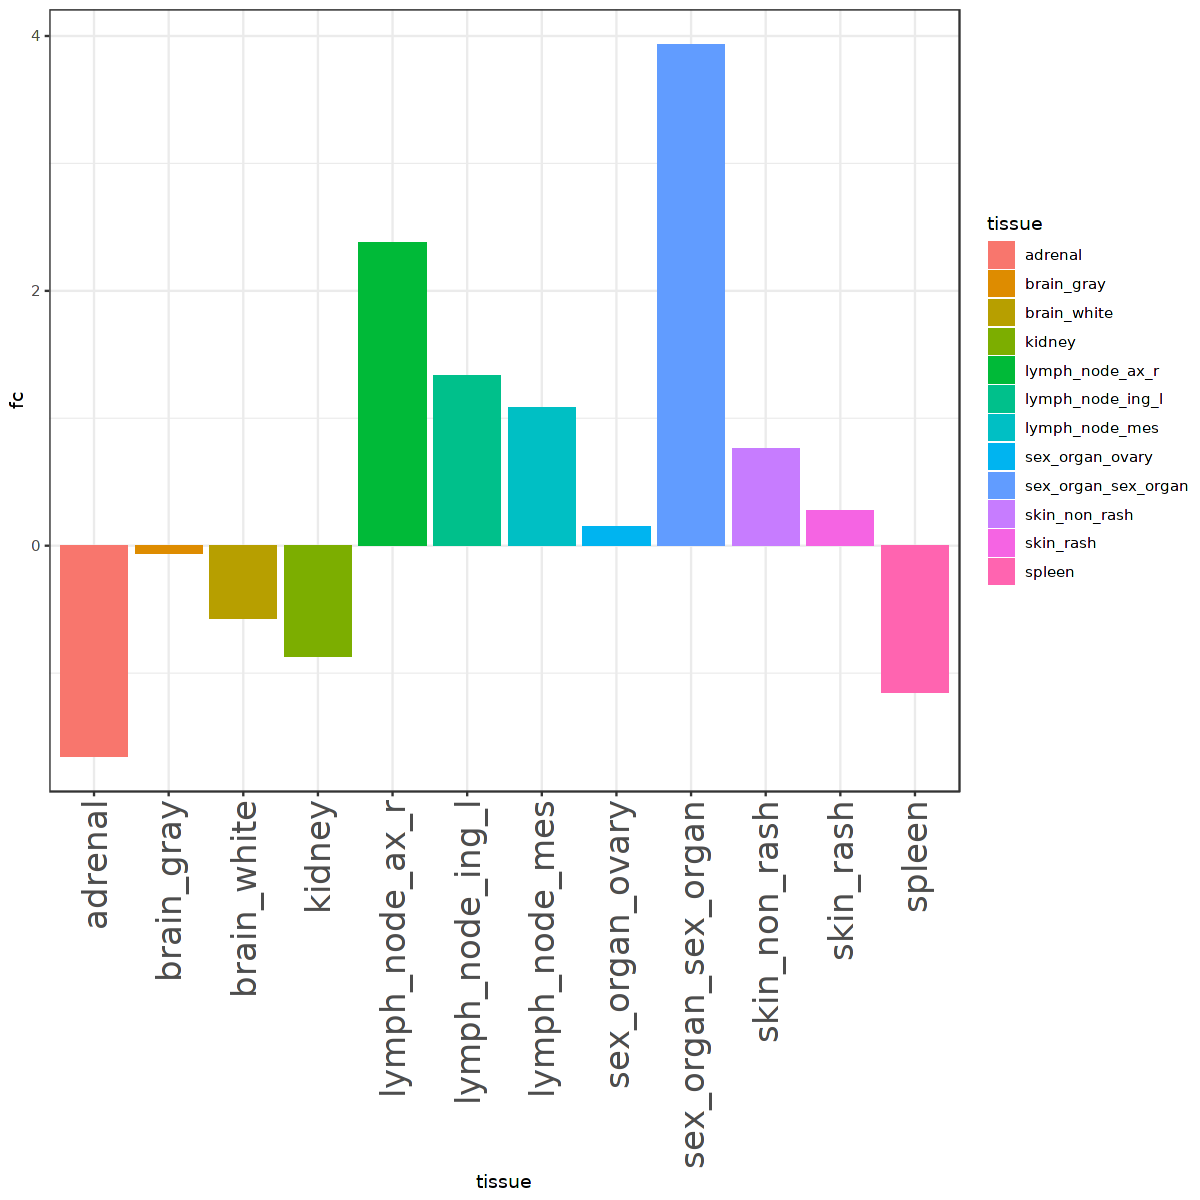

In [128]:
plot_gene_fcs('KIF1A')

## PC2 vs PC3

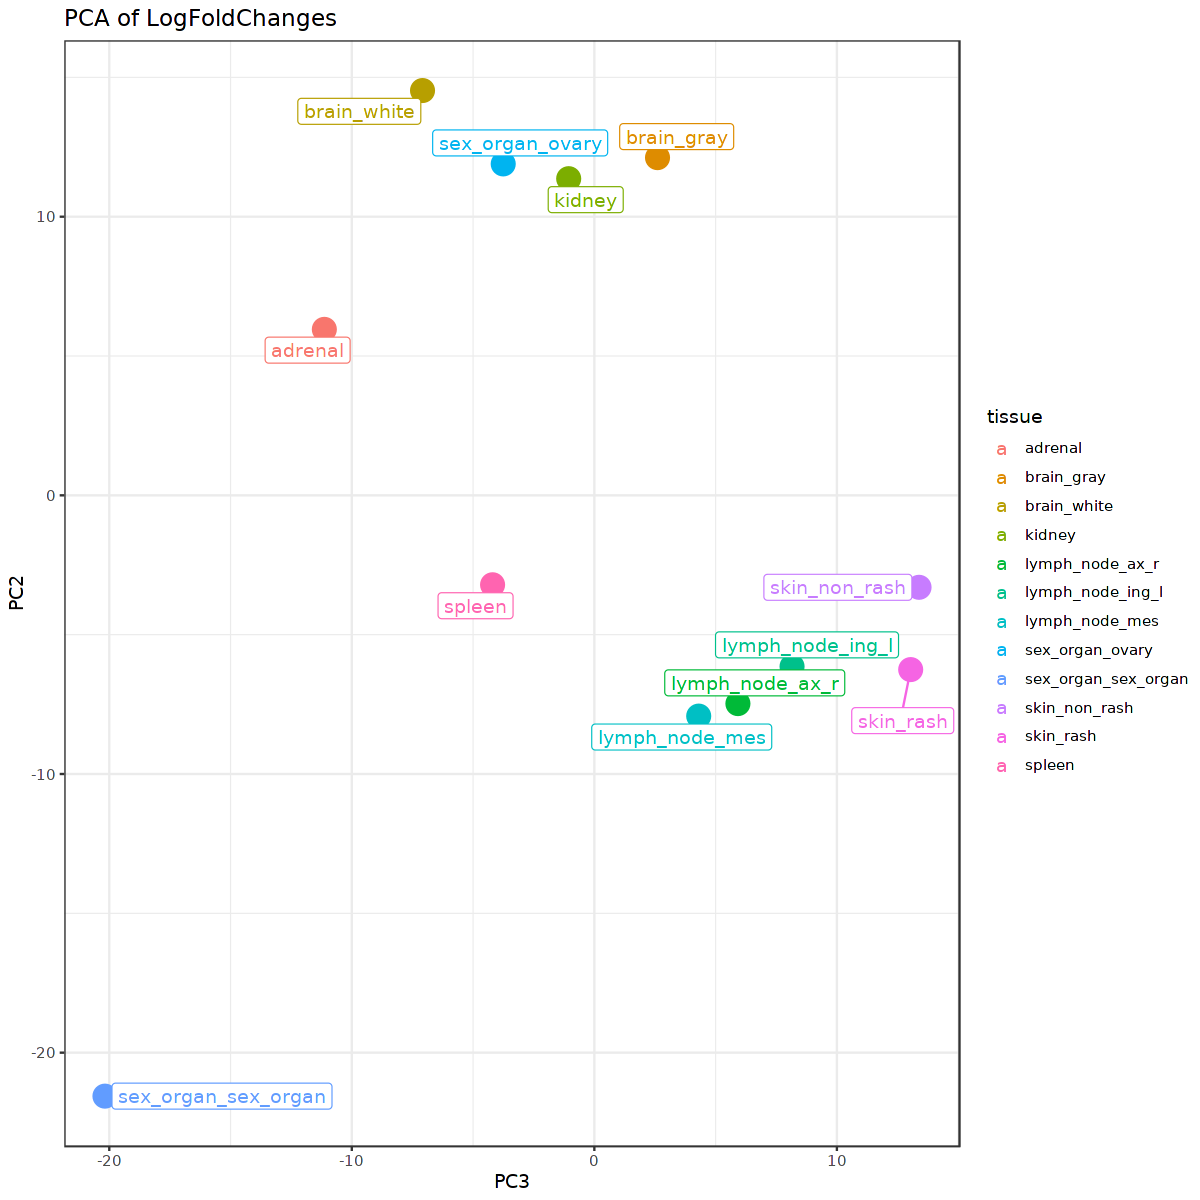

In [91]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(plot.df, aes(color=tissue, x=PC3, y=PC2)) + 
    geom_point(size=6) + 
    theme_bw() + 
    geom_label_repel(aes(label=tissue)) + 
    ggtitle('PCA of LogFoldChanges')

In [95]:
n.top.genes.per.pc <- 40

loaded.genes <- unique(c(
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC2')]),decreasing = T)),n=n.top.genes.per.pc),
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC3')]),decreasing = T)),n=n.top.genes.per.pc)
    ))

loading_scale <- 0.7e2
loaded.genes.df <- as.data.frame(pca.lfc.sel$rotation[loaded.genes,c('PC2','PC3')])

loaded.genes.df$symbol <- gene_map$external_gene_name[match(rownames(loaded.genes.df), gene_map$Geneid)]

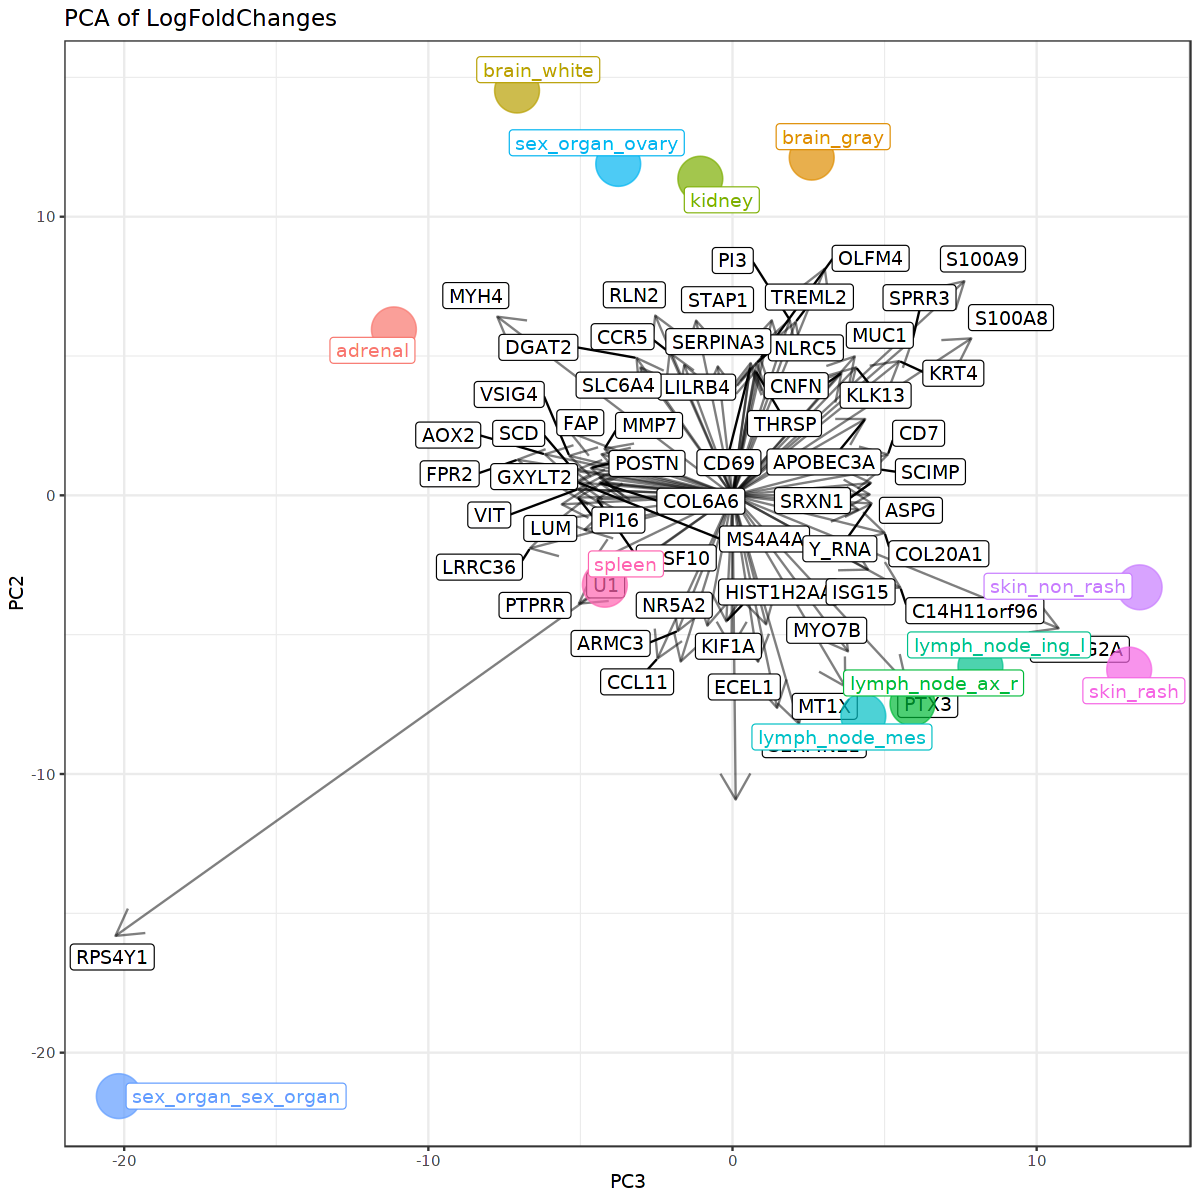

In [96]:
ggplot(plot.df, aes(color=tissue, x=PC3, y=PC2)) + 
    theme_bw() + 
    geom_segment(
        alpha=0.5,
        arrow = arrow(),
        data=loaded.genes.df,
        aes(x=0,y=0,xend=PC3*loading_scale,yend=PC2*loading_scale),inherit.aes=F
    ) +   ggtitle('PCA of LogFoldChanges') +
    geom_label_repel(data=loaded.genes.df,aes(x=PC3*loading_scale,y=PC2*loading_scale,label=symbol),inherit.aes=F,max.overlaps=100) +
    geom_point(size=12, alpha=0.7) +
    geom_label_repel(aes(label=tissue)) +
    theme(legend.position = 'none')

## PC3 vs PC4

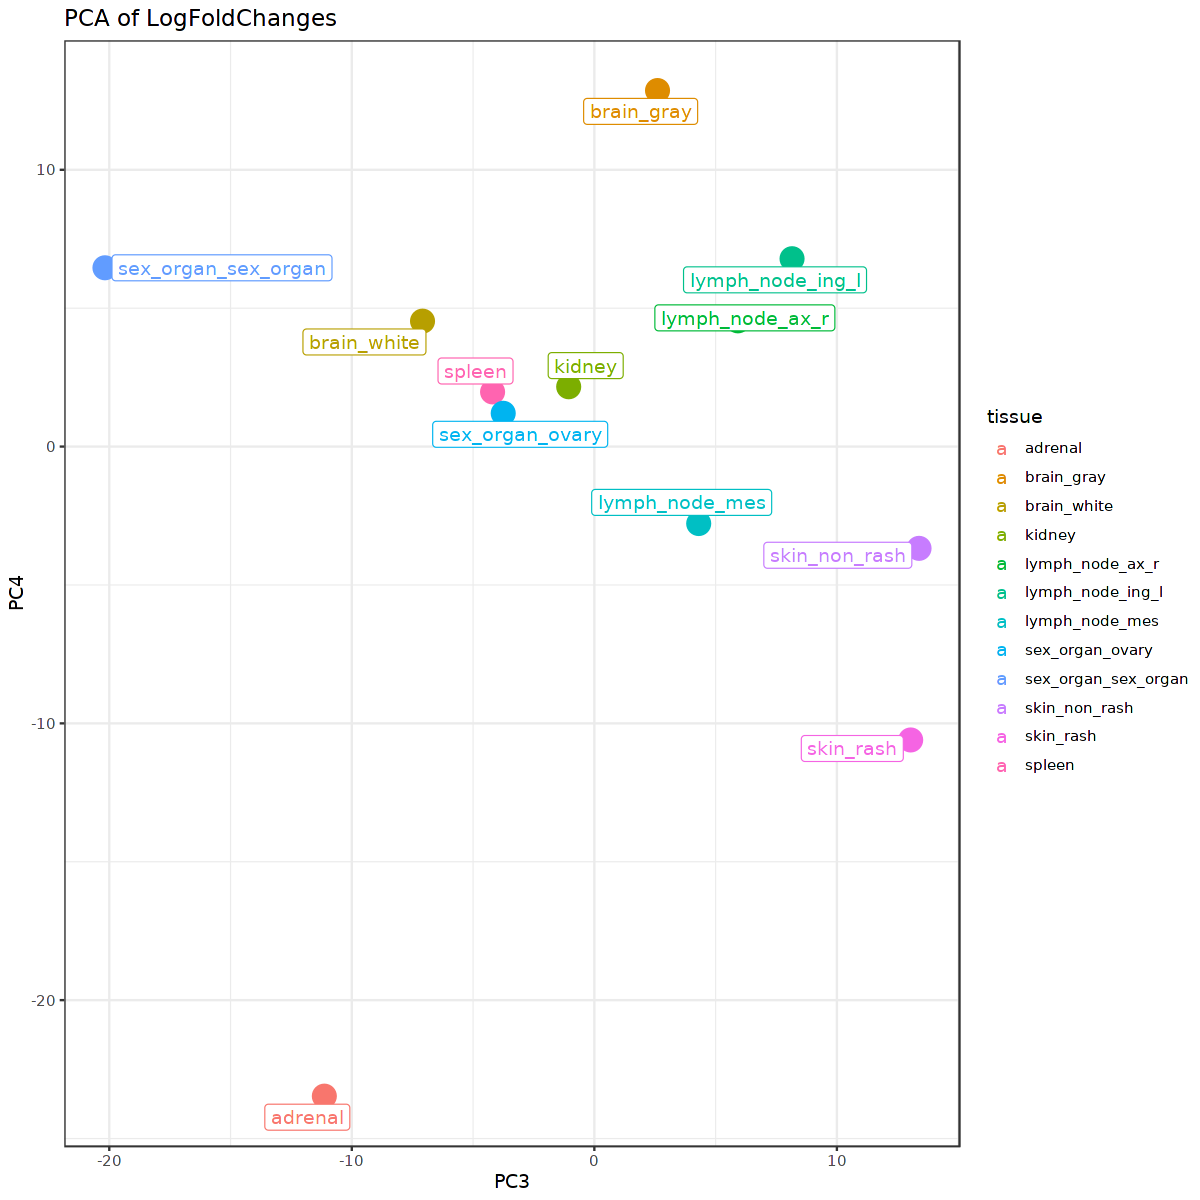

In [100]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(plot.df, aes(color=tissue, x=PC3, y=PC4)) + 
    geom_point(size=6) + 
    theme_bw() + 
    geom_label_repel(aes(label=tissue)) + 
    ggtitle('PCA of LogFoldChanges')